## 1.Series

In [1]:
import numpy as np
import pandas as pd

Series类似于一维数组的对象，
由一组数据以及一组与之相关的数据标签（即索引）组成，
即index和values两部分，可以通过索引的方式选取Series中的单个或一组值。
默认index从0开始
NumPy 数组通过隐式定义的整数索引获取数值，
而Pandas的Series对象用一种显式定义的索引与数值关联。

In [2]:
pd.Series([1,3,6,np.nan,33,1])

0     1.0
1     3.0
2     6.0
3     NaN
4    33.0
5     1.0
dtype: float64

In [3]:
score_dict = {'zhangan': 80, 'lisi': 62, 'wangwu': 97}
score= pd.Series(score_dict)
score

zhangan    80
lisi       62
wangwu     97
dtype: int64

In [4]:
score.index

Index(['zhangan', 'lisi', 'wangwu'], dtype='object')

In [5]:
score.values

array([80, 62, 97], dtype=int64)

## 2.DataFrame

### 2.1 DataFrame的简单运用

DataFrame
DataFrame是一个表格型的数据类型，每列值类型可以不同
DataFrame既有行索引也有列索引，它可以被看做由Series组成的字典（共用同一个索引）。


In [6]:
pd.DataFrame([{'name': 'zhangsan', 'score': 80,'city':'chengdu'}, {'name': 'lisi', 'score': 87,'sex':'male',}])

,name,score,city,sex
0,zhangsan,80,chengdu,NaN
1,lisi,87,NaN,male


In [7]:
dates = pd.date_range('2020-08-19',periods=6)
dates

DatetimeIndex(['2020-08-19', '2020-08-20', '2020-08-21', '2020-08-22',
               '2020-08-23', '2020-08-24'],
              dtype='datetime64[ns]', freq='D')

In [8]:
# dates = pd.date_range('2020-08-19','2020-08-24') # 起始、结束  与上述等价
# numpy.random.randn(d0, d1, …, dn)是从标准正态分布中返回一个或多个样本值。
df=pd.DataFrame(np.random.randn(6,4),index=dates,columns=['col1','col2','col3','col4'])
df

,col1,col2,col3,col4
2020-08-19,-0.472738,0.608360,-0.768871,0.153302
2020-08-20,-0.855040,-0.191934,-0.053564,0.415958
2020-08-21,0.745352,0.512216,0.827354,1.533849
2020-08-22,-0.868897,-0.535029,-0.753466,-1.338100
2020-08-23,1.925336,-0.557660,0.920783,1.000471
2020-08-24,-1.700017,-0.232212,1.032795,-0.590229


In [9]:
# 取出一列的值
df['col3']
# 取出某个单元格的值
df['col3']['2020-08-22']

-0.7534658565068821

In [10]:
# 未指定行标签和列标签的数据，从0开始
pd.DataFrame(np.arange(12).reshape(3,4))

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [11]:
# 根据列构造DF
df2=pd.DataFrame({
    'A': [1,2,3,4],
    'B': pd.Timestamp('20210606'),
    'C': pd.Series([1,6,9,10],dtype='float32'),
    'D': np.array([3] * 4,dtype='int32'),
    'E': pd.Categorical(['test','train','test','train']),
    'F': 'foo'
})
df2

,A,B,C,D,E,F
0,1,2021-06-06,1.0,3,test,foo
1,2,2021-06-06,6.0,3,train,foo
2,3,2021-06-06,9.0,3,test,foo
3,4,2021-06-06,10.0,3,train,foo


In [12]:
#索引
df2.index

RangeIndex(start=0, stop=4, step=1)

In [13]:
# 显示所有列名称
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [14]:
# 显示所有的值
df2.values

array([[1, Timestamp('2021-06-06 00:00:00'), 1.0, 3, 'test', 'foo'],
       [2, Timestamp('2021-06-06 00:00:00'), 6.0, 3, 'train', 'foo'],
       [3, Timestamp('2021-06-06 00:00:00'), 9.0, 3, 'test', 'foo'],
       [4, Timestamp('2021-06-06 00:00:00'), 10.0, 3, 'train', 'foo']],
      dtype=object)

In [15]:
# 数据总结 
df2.describe()

,A,C,D
count,4.000000,4.000000,4.0
mean,2.500000,6.500000,3.0
std,1.290994,4.041452,0.0
min,1.000000,1.000000,3.0
25%,1.750000,4.750000,3.0
50%,2.500000,7.500000,3.0
75%,3.250000,9.250000,3.0
max,4.000000,10.000000,3.0


In [16]:
# 数据转置
# np.transpose(df2)
df2.T

,0,1,2,3
A,1,2,3,4
B,2021-06-06 00:00:00,2021-06-06 00:00:00,2021-06-06 00:00:00,2021-06-06 00:00:00
C,1.0,6.0,9.0,10.0
D,3,3,3,3
E,test,train,test,train
F,foo,foo,foo,foo


axis=1表示行
axis=0表示列
默认ascending(升序)为True
ascending=True表示升序,ascending=False表示降序
按照行的升序

In [17]:
df2.sort_index(axis=1,ascending=True)

,A,B,C,D,E,F
0,1,2021-06-06,1.0,3,test,foo
1,2,2021-06-06,6.0,3,train,foo
2,3,2021-06-06,9.0,3,test,foo
3,4,2021-06-06,10.0,3,train,foo


In [19]:
# 按照行降序
df2.sort_index(axis=1,ascending=False)

,F,E,D,C,B,A
0,foo,test,3,1.0,2021-06-06,1
1,foo,train,3,6.0,2021-06-06,2
2,foo,test,3,9.0,2021-06-06,3
3,foo,train,3,10.0,2021-06-06,4


In [20]:
# 表示按列降序与按列升序
df2.sort_index(axis=0,ascending=False)

,A,B,C,D,E,F
3,4,2021-06-06,10.0,3,train,foo
2,3,2021-06-06,9.0,3,test,foo
1,2,2021-06-06,6.0,3,train,foo
0,1,2021-06-06,1.0,3,test,foo


In [21]:
df2.sort_index(axis=0,ascending=True)

,A,B,C,D,E,F
0,1,2021-06-06,1.0,3,test,foo
1,2,2021-06-06,6.0,3,train,foo
2,3,2021-06-06,9.0,3,test,foo
3,4,2021-06-06,10.0,3,train,foo


In [22]:
# 对特定列数值排列，表示对C列降序排列
df2.sort_values(by='C',ascending=False)

,A,B,C,D,E,F
3,4,2021-06-06,10.0,3,train,foo
2,3,2021-06-06,9.0,3,test,foo
1,2,2021-06-06,6.0,3,train,foo
0,1,2021-06-06,1.0,3,test,foo


## 3.pandas选择数据

### 3.1 筛选

In [23]:
dates = pd.date_range('20200819', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2020-08-19,0,1,2,3
2020-08-20,4,5,6,7
2020-08-21,8,9,10,11
2020-08-22,12,13,14,15
2020-08-23,16,17,18,19
2020-08-24,20,21,22,23


In [24]:
# 检索A列
df['A']

2020-08-19     0
2020-08-20     4
2020-08-21     8
2020-08-22    12
2020-08-23    16
2020-08-24    20
Freq: D, Name: A, dtype: int32

In [25]:
df.A

2020-08-19     0
2020-08-20     4
2020-08-21     8
2020-08-22    12
2020-08-23    16
2020-08-24    20
Freq: D, Name: A, dtype: int32

In [26]:
# 选择跨越多行或多列
# 选取前3行
df[1:3]

,A,B,C,D
2020-08-20,4,5,6,7
2020-08-21,8,9,10,11


In [27]:
df['2020-08-19':'2020-08-21']

,A,B,C,D
2020-08-19,0,1,2,3
2020-08-20,4,5,6,7
2020-08-21,8,9,10,11


In [28]:
# 根据标签选择数据
# 获取特定行或列
# 指定行数据
df.loc['20200819']

A    0
B    1
C    2
D    3
Name: 2020-08-19 00:00:00, dtype: int32

In [29]:
# 指定列
# 两种方式
df.loc[:,'A':'B']

,A,B
2020-08-19,0,1
2020-08-20,4,5
2020-08-21,8,9
2020-08-22,12,13
2020-08-23,16,17
2020-08-24,20,21


In [30]:
df.loc[:,['A','B']]

,A,B
2020-08-19,0,1
2020-08-20,4,5
2020-08-21,8,9
2020-08-22,12,13
2020-08-23,16,17
2020-08-24,20,21


In [3]:
# 行与列同时检索
df.loc['20200819',['A','B']]

NameError: name 'df' is not defined

In [7]:
# 根据序列iloc
# 获取特定位置的值
df

NameError: name 'df' is not defined

In [8]:
df.iloc[3,1]

NameError: name 'df' is not defined

In [9]:
# 不包含5或3，同列表切片
df.iloc[0:5,1:3] 

NameError: name 'df' is not defined

In [35]:
# 跨行操作
df.iloc[[1,3,5],1:3]

,B,C
2020-08-20,5,6
2020-08-22,13,14
2020-08-24,21,22


In [36]:
print(df.iloc[:3,[0,2]]) # 结果同上

            A   C
2020-08-19  0   2
2020-08-20  4   6
2020-08-21  8  10


In [37]:
# 通过判断的筛选
df[df.A>8]

,A,B,C,D
2020-08-22,12,13,14,15
2020-08-23,16,17,18,19
2020-08-24,20,21,22,23


In [39]:
# 通过判断的筛选
df.loc[df.A>8]

,A,B,C,D
2020-08-22,12,13,14,15
2020-08-23,16,17,18,19
2020-08-24,20,21,22,23


In [40]:
df.loc['20200819','A':'B']

A    0
B    1
Name: 2020-08-19 00:00:00, dtype: int32

In [41]:
df.iloc[0,0:2]

A    0
B    1
Name: 2020-08-19 00:00:00, dtype: int32

## 4.Pandas设置值

### 4.1 创建数据

In [42]:

# 创建数据
dates = pd.date_range('20200820',periods=6)
df = pd.DataFrame(np.arange(24).reshape(6,4), index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2020-08-20,0,1,2,3
2020-08-21,4,5,6,7
2020-08-22,8,9,10,11
2020-08-23,12,13,14,15
2020-08-24,16,17,18,19
2020-08-25,20,21,22,23


### 4.2 根据位置设置loc和iloc

In [43]:
# 根据位置设置loc和iloc
df.iloc[2,2] = 111
df.loc['20200820','B'] = 2222
df

,A,B,C,D
2020-08-20,0,2222,2,3
2020-08-21,4,5,6,7
2020-08-22,8,9,111,11
2020-08-23,12,13,14,15
2020-08-24,16,17,18,19
2020-08-25,20,21,22,23


### 4.3 根据条件设置

In [44]:
# 根据条件设置
# 更改B中的数，而更改的位置取决于4的位置，并设相应位置的数为0
df.B[df.A>4] = 0
df

,A,B,C,D
2020-08-20,0,2222,2,3
2020-08-21,4,5,6,7
2020-08-22,8,0,111,11
2020-08-23,12,0,14,15
2020-08-24,16,0,18,19
2020-08-25,20,0,22,23


In [45]:
df.B.loc[df.A>4] = 0
df

,A,B,C,D
2020-08-20,0,2222,2,3
2020-08-21,4,5,6,7
2020-08-22,8,0,111,11
2020-08-23,12,0,14,15
2020-08-24,16,0,18,19
2020-08-25,20,0,22,23


### 4.4 按行或列设置

In [46]:
# 按行或列设置
# 列批处理，F列全改为NaN
df['F'] = np.nan
df

,A,B,C,D,F
2020-08-20,0,2222,2,3,NaN
2020-08-21,4,5,6,7,NaN
2020-08-22,8,0,111,11,NaN
2020-08-23,12,0,14,15,NaN
2020-08-24,16,0,18,19,NaN
2020-08-25,20,0,22,23,NaN


### 4.5 添加Series序列(长度必须对齐)

In [47]:
ser=pd.Series([1,2,3,4,5,6], index=pd.date_range('20200820',periods=6))
ser

2020-08-20    1
2020-08-21    2
2020-08-22    3
2020-08-23    4
2020-08-24    5
2020-08-25    6
Freq: D, dtype: int64

In [48]:
df['E']=ser
df

,A,B,C,D,F,E
2020-08-20,0,2222,2,3,NaN,1
2020-08-21,4,5,6,7,NaN,2
2020-08-22,8,0,111,11,NaN,3
2020-08-23,12,0,14,15,NaN,4
2020-08-24,16,0,18,19,NaN,5
2020-08-25,20,0,22,23,NaN,6


In [49]:
df.loc['20200820','A'] = 67
df

,A,B,C,D,F,E
2020-08-20,67,2222,2,3,NaN,1
2020-08-21,4,5,6,7,NaN,2
2020-08-22,8,0,111,11,NaN,3
2020-08-23,12,0,14,15,NaN,4
2020-08-24,16,0,18,19,NaN,5
2020-08-25,20,0,22,23,NaN,6


In [50]:
df.iloc[0,0] = 76
df

,A,B,C,D,F,E
2020-08-20,76,2222,2,3,NaN,1
2020-08-21,4,5,6,7,NaN,2
2020-08-22,8,0,111,11,NaN,3
2020-08-23,12,0,14,15,NaN,4
2020-08-24,16,0,18,19,NaN,5
2020-08-25,20,0,22,23,NaN,6


### 4.7 修改一整行数据

In [51]:
# 修改一整行数据
df.iloc[1] = np.nan # df.iloc[1,:]=np.nan
df

,A,B,C,D,F,E
2020-08-20,76.0,2222.0,2.0,3.0,NaN,1.0
2020-08-21,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-22,8.0,0.0,111.0,11.0,NaN,3.0
2020-08-23,12.0,0.0,14.0,15.0,NaN,4.0
2020-08-24,16.0,0.0,18.0,19.0,NaN,5.0
2020-08-25,20.0,0.0,22.0,23.0,NaN,6.0


In [52]:
df.loc['20200820'] = np.nan # df.loc['20180820,:']=np.nan
df

,A,B,C,D,F,E
2020-08-20,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-21,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-22,8.0,0.0,111.0,11.0,NaN,3.0
2020-08-23,12.0,0.0,14.0,15.0,NaN,4.0
2020-08-24,16.0,0.0,18.0,19.0,NaN,5.0
2020-08-25,20.0,0.0,22.0,23.0,NaN,6.0


## 5.Pandas处理丢失数据

### 5.1 创建含NaN的矩阵

In [53]:
# Pandas处理丢失数据
# 创建含NaN的矩阵
# 如何填充和删除NaN数据?
dates = pd.date_range('20200820',periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D']) 
df

,A,B,C,D
2020-08-20,0,1,2,3
2020-08-21,4,5,6,7
2020-08-22,8,9,10,11
2020-08-23,12,13,14,15
2020-08-24,16,17,18,19
2020-08-25,20,21,22,23


In [54]:
# a.reshape(6,4)等价于a.reshape((6,4))
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
df

,A,B,C,D
2020-08-20,0,NaN,2.0,3
2020-08-21,4,5.0,NaN,7
2020-08-22,8,9.0,10.0,11
2020-08-23,12,13.0,14.0,15
2020-08-24,16,17.0,18.0,19
2020-08-25,20,21.0,22.0,23


### 5.2 删除掉有NaN的行或列

In [55]:
# 删除掉有NaN的行或列
df.dropna() # 默认是删除掉含有NaN的行

,A,B,C,D
2020-08-22,8,9.0,10.0,11
2020-08-23,12,13.0,14.0,15
2020-08-24,16,17.0,18.0,19
2020-08-25,20,21.0,22.0,23


In [56]:
df.dropna(
    axis=0, # 0对行进行操作;1对列进行操作
    how='any' # 'any':只要存在NaN就drop掉；'all':必须全部是NaN才drop
)

,A,B,C,D
2020-08-22,8,9.0,10.0,11
2020-08-23,12,13.0,14.0,15
2020-08-24,16,17.0,18.0,19
2020-08-25,20,21.0,22.0,23


In [57]:
# 删除掉所有含有NaN的列
df.dropna(
    axis=1,
    how='any'
)

,A,D
2020-08-20,0,3
2020-08-21,4,7
2020-08-22,8,11
2020-08-23,12,15
2020-08-24,16,19
2020-08-25,20,23


### 5.3 替换NaN值为0或者其他

In [58]:
# 替换NaN值为0或者其他
df.fillna(value=0)

,A,B,C,D
2020-08-20,0,0.0,2.0,3
2020-08-21,4,5.0,0.0,7
2020-08-22,8,9.0,10.0,11
2020-08-23,12,13.0,14.0,15
2020-08-24,16,17.0,18.0,19
2020-08-25,20,21.0,22.0,23


### 5.4 是否有缺失数据NaN

In [59]:
# 是否有缺失数据NaN
# 是否为空
df.isnull()

,A,B,C,D
2020-08-20,False,True,False,False
2020-08-21,False,False,True,False
2020-08-22,False,False,False,False
2020-08-23,False,False,False,False
2020-08-24,False,False,False,False
2020-08-25,False,False,False,False


In [60]:
# 是否为NaN
df.isna()

,A,B,C,D
2020-08-20,False,True,False,False
2020-08-21,False,False,True,False
2020-08-22,False,False,False,False
2020-08-23,False,False,False,False
2020-08-24,False,False,False,False
2020-08-25,False,False,False,False


In [61]:
# 检测某列是否有缺失数据NaN
df.isnull().any()

A    False
B     True
C     True
D    False
dtype: bool

In [62]:
# 检测数据中是否存在NaN,如果存在就返回True
np.any(df.isnull())==True

True

## 6.Pandas导入导出

### 6.1 导入数据

In [63]:
# 读取csv
data = pd.read_csv('student.csv')
# 打印出data
data

,Student ID,name,age,gender
0,1100,Kelly,22,Female
1,1101,Clo,21,Female
2,1102,Tilly,22,Female
3,1103,Tony,24,Male
4,1104,David,20,Male
5,1105,Catty,22,Female
6,1106,M,3,Female
7,1107,N,43,Male
8,1108,A,13,Male
9,1109,S,12,Male


In [64]:
# 前三行
data.head(3)

,Student ID,name,age,gender
0,1100,Kelly,22,Female
1,1101,Clo,21,Female
2,1102,Tilly,22,Female


In [65]:
# 后三行
data.tail(3)

,Student ID,name,age,gender
11,1111,Dw,3,Female
12,1112,Q,23,Male
13,1113,W,21,Female


### 6.2 导出数据

In [66]:
# 将资料存取成pickle，pickle模块实现了用于序列化和反序列化Python对象结构的二进制协议
data.to_pickle('student.pickle')

In [67]:
# 读取pickle文件并打印
print(pd.read_pickle('student.pickle'))

    Student ID  name   age  gender
0         1100  Kelly   22  Female
1         1101    Clo   21  Female
2         1102  Tilly   22  Female
3         1103   Tony   24    Male
4         1104  David   20    Male
5         1105  Catty   22  Female
6         1106      M    3  Female
7         1107      N   43    Male
8         1108      A   13    Male
9         1109      S   12    Male
10        1110  David   33    Male
11        1111     Dw    3  Female
12        1112      Q   23    Male
13        1113      W   21  Female


## 7.Pandas合并操作

### 7.1 Pandas合并concat

In [68]:
# 定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])
df1

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0


In [69]:
df2

,a,b,c,d
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0


In [70]:
df3

,a,b,c,d
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0


In [71]:
# concat纵向合并
pd.concat([df1,df2,df3],axis=0)

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0


In [72]:
# 上述合并过程中，index重复，下面给出重置index方法
# 只需要将index_ignore设定为True即可
pd.concat([df1,df2,df3],axis=0,ignore_index=True)

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,2.0,2.0,2.0,2.0
7,2.0,2.0,2.0,2.0
8,2.0,2.0,2.0,2.0


In [73]:
# join 合并方式
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])
df1

,a,b,c,d
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0


In [74]:
df2

,b,c,d,e
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0


In [75]:
'''
join='outer',函数默认为join='outer'。此方法是依照column来做纵向合并，有相同的column上下合并在一起，
其他独自的column各自成列，原来没有值的位置皆为NaN填充。
'''
# 纵向"外"合并df1与df2
pd.concat([df1,df2],axis=0,join='outer',sort=False)

,a,b,c,d,e
1,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,NaN
2,NaN,1.0,1.0,1.0,1.0
3,NaN,1.0,1.0,1.0,1.0
4,NaN,1.0,1.0,1.0,1.0


In [76]:
# 修改index
pd.concat([df1,df2],axis=0,join='outer',ignore_index=True,sort=True)

,a,b,c,d,e
0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,NaN
3,NaN,1.0,1.0,1.0,1.0
4,NaN,1.0,1.0,1.0,1.0
5,NaN,1.0,1.0,1.0,1.0


In [77]:
# join='inner'合并相同的字段
# 纵向"内"合并df1与df2
pd.concat([df1,df2],axis=0,join='inner')

,b,c,d
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


In [78]:
# join_axes(依照axes合并)
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])
df1

,a,b,c,d
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0


In [83]:
df2

,b,c,d,e
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0


In [84]:
# 依照df1.index进行横向合并
pd.concat([df1,df2],axis=1,join_axes=[df1.index])

,a,b,c,d,b,c,d,e
1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [85]:
# 移除join_axes参数,打印结果
pd.concat([df1,df2],axis=1)

,a,b,c,d,b,c,d,e
1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0


In [86]:
# append(添加数据)
# append只有纵向合并，没有横向合并
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])
s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])
# 将df2合并到df1下面,以及重置index,并打印出结果
df1.append(df2,ignore_index=True)

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0


In [87]:
# 合并多个df,将df2与df3合并至df1的下面,以及重置index,并打印出结果
df1.append([df2,df3], ignore_index=True)

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,2.0,2.0,2.0,2.0
7,2.0,2.0,2.0,2.0
8,2.0,2.0,2.0,2.0


In [88]:
# 合并series,将s1合并至df1，以及重置index，并打印结果
df1.append(s1,ignore_index=True)

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,2.0,3.0,4.0


In [ ]:
# 总结:两种常用合并方式
pd.concat([df1, df2, df3], axis=0, ignore_index=True)

In [ ]:
df1.append([df2, df3], ignore_index=True)

### 7.2.Pandas 合并 merge

#### 7.2.1 定义资料集并打印出

In [89]:
# 依据一组key合并
# 定义资料集并打印出
left = pd.DataFrame({'key' : ['K0','K1','K2','K3'],
                     'A' : ['A0','A1','A2','A3'],
                     'B' : ['B0','B1','B2','B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C' : ['C0', 'C1', 'C2', 'C3'],
                      'D' : ['D0', 'D1', 'D2', 'D3']})
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [90]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


#### 7.2.2 依据key column合并,并打印

In [91]:
# 依据key column合并,并打印
# select left_table.key,left_table.A,right_table.B from left_table left join right_table on left_table.key=right_table.key
pd.merge(left,right,on='key')


,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [92]:
#  依据两组key合并
#定义资料集并打印出
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [93]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


#### 7.2.3 两列合并

In [94]:
# 依据key1与key2 columns进行合并，并打印出四种结果['left', 'right', 'outer', 'inner']
pd.merge(left, right, on=['key1', 'key2'], how='inner')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [95]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [96]:
pd.merge(left, right, on=['key1', 'key2'], how='left')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [97]:
pd.merge(left, right, on=['key1', 'key2'], how='right')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


#### 7.2.4 Indicator设置合并列名称

In [ ]:
# Indicator
df1 = pd.DataFrame({'col1':[0,1],'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})
df1

In [ ]:
df2

In [ ]:
# 依据col1进行合并,并启用indicator=True,最后打印
#  indicator=True会将合并的记录放在新的一列
pd.merge(df1,df2,on='col1',how='outer',indicator=True)
# pd.merge(df1,df2,on='col1',how='outer',indicator=False)

In [ ]:
# 自定义indicator column的名称,并打印出
pd.merge(df1,df2,on='col1',how='outer',indicator='indicator_column')

#### 7.2.5 依据index合并

In [ ]:
# 依据index合并
#定义资料集并打印出
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])
left

In [ ]:
right

In [ ]:
# 依据左右资料集的index进行合并,how='outer',并打印
# inner（默认）；outer、left、right
pd.merge(left,right,left_index=True,right_index=True,how='outer')

In [ ]:
# 依据左右资料集的index进行合并,how='inner',并打印
pd.merge(left,right,left_index=True,right_index=True,how='inner')

#### 7.2.6 解决overlapping的问题

In [98]:
# 解决overlapping 重叠 的问题
#
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
boys

,k,age
0,K0,1
1,K1,2
2,K2,3


In [99]:
girls

,k,age
0,K0,4
1,K0,5
2,K3,6


In [100]:
# 使用suffixes解决overlapping的问题
# age重复了,可通过suffixes设置,以此保证不重复,不同名
pd.merge(boys,girls,on='k',suffixes=['_boy','_girl'],how='inner')

,k,age_boy,age_girl
0,K0,1,4
1,K0,1,5


## 8.Pandas plot出图

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.Series(np.random.randn(1000), index=np.arange(1000))
print(data)

0     -0.461117
1     -2.019119
2     -0.251923
3      0.931013
4      1.583553
5     -0.927663
6     -0.362239
7     -1.052629
8      0.662661
9     -0.724862
10    -0.853286
11    -2.402047
12    -1.419982
13    -1.078347
14     0.041732
15     0.640257
16    -0.137735
17    -0.325901
18    -1.127756
19    -0.764165
20    -0.319490
21     0.203766
22     1.262629
23    -0.309204
24    -0.758442
25     0.246270
26    -0.513875
27     1.678369
28     0.005369
29     1.632477
         ...   
970   -1.267151
971   -1.271673
972   -1.311423
973   -0.269347
974   -0.455573
975   -0.164193
976   -1.063824
977    0.255307
978   -0.740675
979   -0.772340
980    1.122225
981   -0.249794
982    0.746799
983   -1.370446
984   -0.420165
985    0.870373
986    0.280082
987   -0.858651
988    0.199332
989   -0.172466
990   -0.456013
991   -0.128147
992   -0.068127
993    1.849299
994    0.783293
995    1.200140
996    0.873499
997   -0.721079
998   -1.378469
999    1.220762
Length: 1000, dtype: flo

In [ ]:
print(data.cumsum())

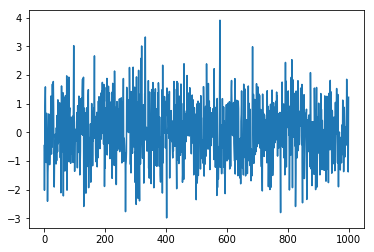

In [102]:
# data本来就是一个数据，所以我们可以直接plot
data.plot()
plt.show()

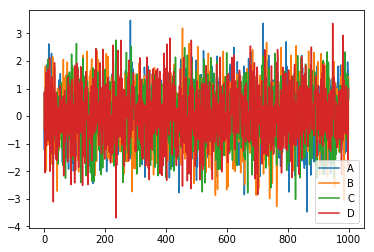

In [103]:
# np.random.randn(1000,4) 随机生成1000行4列数据
# list("ABCD")会变为['A','B','C','D']
data = pd.DataFrame(
    np.random.randn(1000,4),
    index=np.arange(1000),
    columns=list("ABCD")
)
data.cumsum()
data.plot()
plt.show()

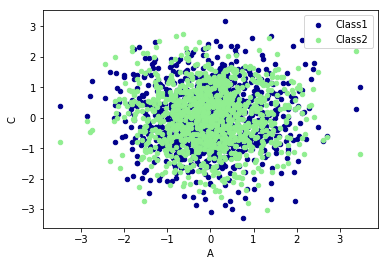

In [104]:
ax = data.plot.scatter(x='A',y='B',color='DarkBlue',label='Class1')
# 将之下这个 data 画在上一个 ax 上面
data.plot.scatter(x='A',y='C',color='LightGreen',label='Class2',ax=ax)
plt.show()

## 索引对齐

In [ ]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

In [ ]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
columns=['A', 'B', 'C', 'D'])
df

In [ ]:
# 以自然常数e为底的指数函数
np.exp(ser)

In [ ]:
np.sin(df * np.pi / 4)

当在两个 Series 或 DataFrame 对象上进行二元计算时，Pandas 会在
计算过程中对齐两个对象的索引
对于缺失位置的数据，Pandas 会用 NaN 填充，表示“此处无数”。

In [ ]:
#美国州面积
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
'California': 423967}, name='area')
#美国人口
population = pd.Series({'California': 38332521, 'Texas': 26448193,
'New York': 19651127}, name='population')
#
population / area

In [ ]:
a = pd.Series([2, 4, 6], index=[0, 1, 2])
b = pd.Series([1, 3, 5], index=[1, 2, 3])
#a+b
a.add(b, fill_value=0)

In [ ]:
rng = np.random.RandomState(0)
a = pd.DataFrame(rng.randint(0, 20, (2, 2)),
columns=list('ab'))
a

In [ ]:
b = pd.DataFrame(rng.randint(0, 10, (3, 3)),
columns=list('bac'))
b

In [ ]:
a+b

DataFrame 和 Series 的运算规则，与NumPy 中二维数组与一维数组的运算规则是一样

In [ ]:
a = rng.randint(10, size=(3, 4))
a

In [ ]:
a-a[0]

In [ ]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

In [ ]:
ser.sum()

In [ ]:
ser.mean()

In [ ]:
df = pd.DataFrame({'A': rng.rand(5),
'B': rng.rand(5)})
df

In [ ]:
df.mean()
df.mean(axis=1)

In [ ]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data': range(6)}, columns=['key', 'data'])
df

In [ ]:
"""
返回值不是一个 DataFrame 对象，而是一个 DataFrameGroupBy 对象。
“延迟计算”（lazy evaluation）
"""
df2=df.groupby('key')
df2

In [ ]:
df2.sum()

In [ ]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data1': range(6),
'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])
df

In [ ]:
df2=df.groupby("key")
df2

In [ ]:
df2.min()

In [ ]:
df2.aggregate(['min', np.median, max])

In [ ]:
df.groupby('key').aggregate({'data1': 'min','data2': 'max'})

In [ ]:
# 过滤函数 返回True，保留数据，返回False过滤掉数据
def filter_func(x):
    return x['data2'].max() < 7
def filter_func2(x):
    return True

In [ ]:
df.groupby('key').filter(filter_func2)

In [ ]:
df.groupby('key').transform(lambda x: x - x.mean())